In [192]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import requests
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [193]:
dataset = pd.read_csv(r'C:\Users\asus\Desktop\Spotify_Song_Attributes11.csv', encoding='ISO-8859-1')

In [ ]:
#data preprocessing
duplicate_rows = dataset[dataset.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
# Display the duplicate rows
print(duplicate_rows)
# Remove duplicate rows from the dataset
dataset = dataset.drop_duplicates()
null_values = dataset.isnull().sum()
print(null_values)##no null values
# Drop rows with any null values
dataset_cleaned = dataset.dropna()
print(f"Number of rows after dropping nulls: {dataset_cleaned.shape[0]}")


Number of duplicate rows: 0
Empty DataFrame
Columns: [trackName, artistName, msPlayed, genre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature]
Index: []

[0 rows x 22 columns]
trackName             0
artistName            0
msPlayed            399
genre                 0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
type                399
id                  399
uri                 399
track_href          399
analysis_url        399
duration_ms           0
time_signature        0
dtype: int64
Number of rows after dropping nulls: 4290


In [ ]:
#audio features
features = [
     'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]


In [ ]:
# Encode genre categories into numerical labels
le = LabelEncoder()
dataset['genre_encoded'] = le.fit_transform(dataset['genre'])


In [197]:
dataset.head(10)

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre_encoded
0,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234.0,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1220,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0,104
1,#BrooklynBloodPop!,SyKo,145610.0,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.5090,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,279
2,$10,Good Morning,25058.0,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.8960,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,240
3,(I Just) Died In Your Arms,Cutting Crew,5504949.0,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.5070,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,16
4,(L)only Child,salem ilese,2237969.0,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,0.6450,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0,17
5,(lol),Eren Cannata,441335.0,guitar case,0.663,0.904,7.0,-4.710,1.0,0.0857,...,0.6750,118.024,audio_features,4DS2UXeR2V5W7R9aype6t1,spotify:track:4DS2UXeR2V5W7R9aype6t1,https://api.spotify.com/v1/tracks/4DS2UXeR2V5W...,https://api.spotify.com/v1/audio-analysis/4DS2...,217627.0,4.0,282
6,"...And to Those I Love, Thanks for Sticking Ar...",$uicideboy$,120005.0,cloud rap,0.792,0.511,2.0,-6.876,1.0,0.0409,...,0.1110,113.983,audio_features,30QR0ndUdiiMQMA9g1PGCm,spotify:track:30QR0ndUdiiMQMA9g1PGCm,https://api.spotify.com/v1/tracks/30QR0ndUdiiM...,https://api.spotify.com/v1/audio-analysis/30QR...,168490.0,4.0,173
7,...Baby One More Time,Britney Spears,107407.0,dance pop,0.759,0.699,0.0,-5.745,0.0,0.0307,...,0.9070,92.960,audio_features,3MjUtNVVq3C8Fn0MP3zhXa,spotify:track:3MjUtNVVq3C8Fn0MP3zhXa,https://api.spotify.com/v1/tracks/3MjUtNVVq3C8...,https://api.spotify.com/v1/audio-analysis/3MjU...,211067.0,4.0,185
8,0 to 100,Sidhu Moose Wala,21354.0,desi hip hop,0.742,0.675,8.0,-6.551,1.0,0.0907,...,0.6790,145.989,audio_features,7cVe3mYMIfhOlz1NXFWv70,spotify:track:7cVe3mYMIfhOlz1NXFWv70,https://api.spotify.com/v1/tracks/7cVe3mYMIfhO...,https://api.spotify.com/v1/audio-analysis/7cVe...,108493.0,4.0,200
9,01:22,colours in the dark,516640.0,lo-fi sleep,0.620,0.122,2.0,-19.470,0.0,0.0428,...,0.0502,72.019,audio_features,3mZxGT3FA0vICzX4owzYGq,spotify:track:3mZxGT3FA0vICzX4owzYGq,https://api.spotify.com/v1/tracks/3mZxGT3FA0vI...,https://api.spotify.com/v1/audio-analysis/3mZx...,129160.0,3.0,384


Elbow Method for Audio Features:


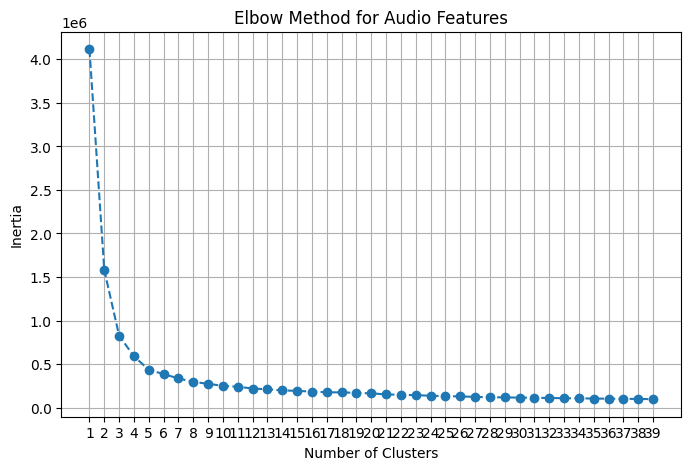

Elbow Method for Genre Features:


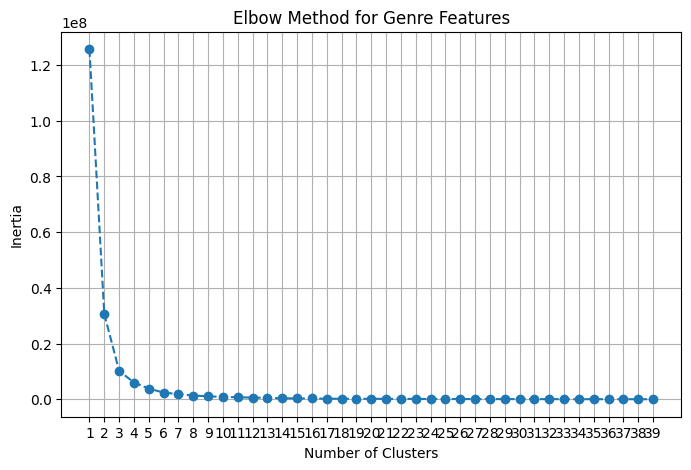

In [ ]:
# Elbow Method to determine the optimal number of clusters for KMeans
def elbow_method(data, cluster_range=range(1, 40), title="Elbow Method"):
    inertia = []  # Correct initialization of inertia list
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)  # Append inertia correctly in each loop

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.title(title)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

# Apply the elbow method on audio features
print("Elbow Method for Audio Features:")
elbow_method(dataset[features], title="Elbow Method for Audio Features")
genre_encoded_reshaped = dataset[['genre_encoded']]  # Use double brackets to create a DataFrame
# Apply the elbow method on genre features
print("Elbow Method for Genre Features:")
elbow_method(genre_encoded_reshaped, title="Elbow Method for Genre Features")

#changed the aprouch from kmeans to hierichical so the elbow method isnt neccessry for genre


In [ ]:
#training the models here i used hierichical for gnere bc it had a lot of samples and kmeans for audio features
# used Silhouette Score to test acurecy of number of clusters
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
genre_one_hot = encoder.fit_transform(dataset[['genre']]).toarray()

scaler = StandardScaler()
genre_encoded_scaled = scaler.fit_transform(genre_encoded_reshaped)

hierarchical = AgglomerativeClustering(n_clusters=None, distance_threshold=0.01)## best number of clusters 540/distance_threshold=1.0/Silhouette Score=0.955
dataset['hierarchical_cluster'] = hierarchical.fit_predict(genre_encoded_scaled)
n_clusters = dataset['hierarchical_cluster'].nunique()
print(f"Number of clusters formed: {n_clusters}")

# Ensure the number of clusters is valid for silhouette scoring
if 2 <= n_clusters < len(dataset):
    # Calculate silhouette score
    silhouette = silhouette_score(genre_one_hot, dataset['hierarchical_cluster'])
    print("Silhouette Score for Genre Hierarchical Clustering:", silhouette)
else:
    print(f"Invalid number of clusters ({n_clusters}) for silhouette scoring.")
\


# KMeans Clustering on Audio Features (using 5 clusters as an example)
kmeans_audio = KMeans(n_clusters=5, random_state=42)
dataset['audio_cluster'] = kmeans_audio.fit_predict(dataset[features])
silhouette = silhouette_score(dataset[features], kmeans_audio.labels_)
print("Silhouette Score:", silhouette)


Number of clusters formed: 369
Silhouette Score for Genre Hierarchical Clustering: 0.9236937513329068
Silhouette Score: 0.4252300674831711


In [ ]:
import scipy.cluster.hierarchy as sch
# Create a dendrogram
plt.figure(figsize=(10, 10))
sch.dendrogram(sch.linkage(genre_encoded_reshaped, method='ward'))
plt.title('Dendrogram for Genre Clustering')
plt.xlabel('Songs')
plt.ylabel('Euclidean Distance')
plt.show()


(4689, 1)


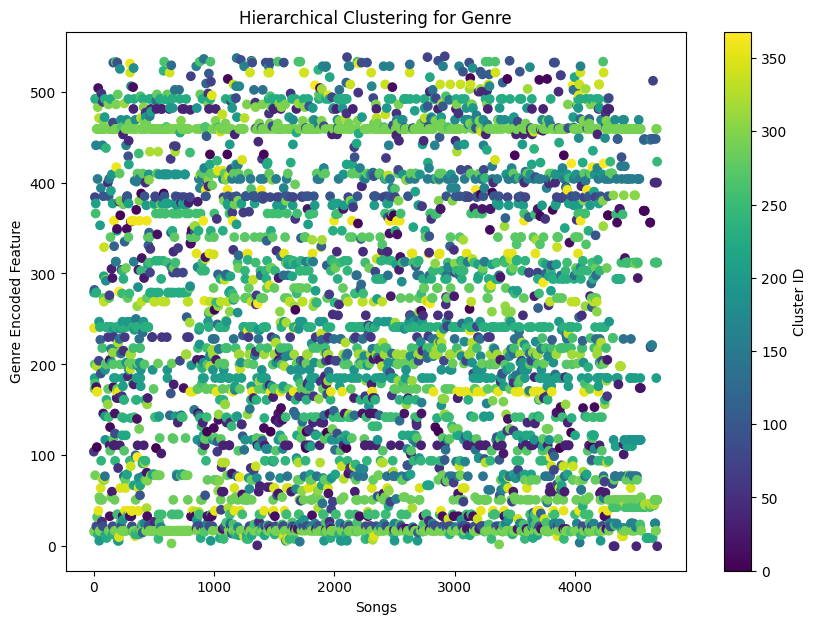

In [ ]:
print(genre_encoded_scaled.shape)

plt.figure(figsize=(10, 7))
plt.scatter(range(len(genre_encoded_scaled)), genre_encoded_scaled, c=dataset['hierarchical_cluster'], cmap='viridis')
plt.title('Hierarchical Clustering for Genre')
plt.xlabel('Songs')
plt.ylabel('Genre Encoded Feature')
plt.colorbar(label='Cluster ID')
plt.show()



In [250]:
# View unique values in the 'genre' column
unique_genres = dataset['genre'].value_counts()

# Print the unique genres
print(unique_genres)
 

genre
pop                   347
alt z                 337
filmi                 206
dance pop              94
art pop                93
                     ... 
egyptian pop            1
japanese vgm            1
american orchestra      1
syrian hip hop          1
arab groove             1
Name: count, Length: 540, dtype: int64


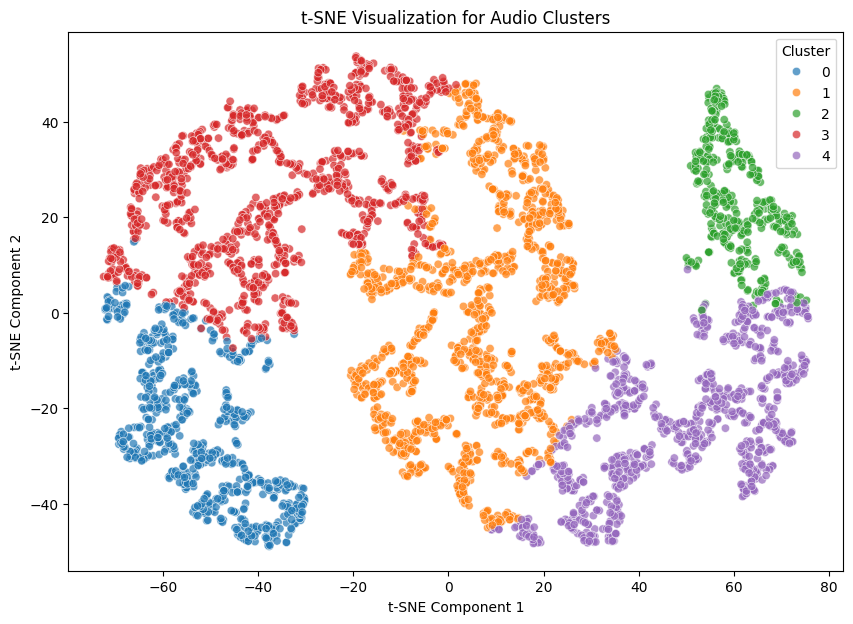

In [240]:
from sklearn.manifold import TSNE
import seaborn as sns


# T-SNE for audio clusters
tsne_audio = TSNE(n_components=2, random_state=42)
audio_tsne = tsne_audio.fit_transform(dataset[features])

# Plotting function
def plot_tsne(tsne_data, cluster_column, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=dataset[cluster_column], palette='tab10', alpha=0.7)
    plt.title(title)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(title="Cluster")
    plt.show()

# Plot T-SNE results
plot_tsne(audio_tsne, cluster_column='audio_cluster', title="t-SNE Visualization for Audio Clusters")



In [ ]:

from fuzzywuzzy import process

# Assuming `dataset` is already loaded and contains the necessary data
feature_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                   'instrumentalness', 'liveness', 'valence', 'tempo']

# Clean the dataset (drop rows with invalid or missing values in feature columns)
songs_df = pd.DataFrame(dataset)  # Replace with actual dataset loading
songs_df[feature_columns] = songs_df[feature_columns].apply(pd.to_numeric, errors='coerce')  # Convert features to numeric
songs_df = songs_df.dropna(subset=feature_columns)  # Drop rows where feature values are NaN

# Preprocess track names to remove encoding issues
songs_df['trackName'] = songs_df['trackName'].apply(lambda x: x.encode('utf-8').decode('utf-8', errors='ignore'))
songs_df['trackName'] = songs_df['trackName'].str.lower().str.strip()

# Prepare training data for KNN
train_data = songs_df[feature_columns].values

# Train the KNN model
knn_model = NearestNeighbors(n_neighbors=11, algorithm='auto', metric='euclidean')
knn_model.fit(train_data)

def recommend_songs_knn(input_song_name, num_recommendations=10):
    # Preprocess the input song name
    input_song_name = input_song_name.lower().strip()
    
    # Check for the best match using fuzzy matching
    best_match = process.extractOne(input_song_name, songs_df['trackName'].tolist())
    if best_match is None or best_match[1] < 80:  # Threshold for similarity
        print(f"Input song '{input_song_name}' not found in the dataset.")
        return None
    
    # Get the exact match from the dataset
    matched_song_name = best_match[0]
    matched_song = songs_df[songs_df['trackName'] == matched_song_name]
    
    if matched_song.empty:
        print(f"Input song '{input_song_name}' not found in the dataset.")
        return None
    
    # Get the features of the input song
    input_features = matched_song[feature_columns].iloc[0].values.reshape(1, -1)
    
    # Find similar songs using the KNN model
    distances, indices = knn_model.kneighbors(input_features, n_neighbors=num_recommendations + 1)
    recommended_indices = indices[0][1:]  # Exclude the input song itself
    recommended_songs = songs_df.iloc[recommended_indices]
    
    # Return recommended songs
    return recommended_songs[['trackName', 'artistName', 'genre']]

# Example usage
input_song_name = "Shirt"  # Replace with a valid song name
try:
    recommendations = recommend_songs_knn(input_song_name, num_recommendations=10)
    if recommendations is not None:
        print("\nRecommended Songs:")
        print(recommendations.to_string(index=False))
except IndexError:
    print(f"Input song '{input_song_name}' not found in the dataset.")



Recommended Songs:
                       trackName       artistName            genre
                       el-khotta    Akher Zapheer arab alternative
                        downhill             Lund        cloud rap
                       sunny day MR TOUT LE MONDE new french touch
upside down (feat. charlie puth)             JVKE modern indie pop
                         hold on Chord Overstreet     acoustic pop
                          in two      Will Paquin        weirdcore
           female energy, part 2           WILLOW     afrofuturism
                   dreamin abt u        mj apanay      bedroom r&b
                     pale yellow          Woodkid      chamber pop
                             $10     Good Morning experimental pop


In [ ]:
input_song_name = "Ganeni"  # Replace with a valid song name from your test dataset
try:
    recommendations = recommend_songs_knn(input_song_name, num_recommendations=10)
    if recommendations is not None:
        print("\nRecommended Songs:")
        print(recommendations.to_string(index=False))
except IndexError:
    print(f"Input song '{input_song_name}' not found in the dataset.")


Recommended Songs:
                       trackName        artistName                   genre
                         waiting          Vicetone                     edm
                           touta       Haifa Wehbe                arab pop
             nancy got a haircut     Alec Benjamin                   alt z
              little do you know             BEAUZ                 pop edm
             lost in translation The Neighbourhood modern alternative rock
need your love (with noah kahan)           Gryffin                     edm
   troublemaker (feat. flo rida)         Olly Murs               dance pop
          fuck up the friendship         Leah Kate                   alt z
                            hope  The Chainsmokers              electropop
                             you            Regard               pop dance


In [ ]:
# Define additional mood presets with feature ranges
mood_presets = {
    'Loud and Energetic': {
        'energy': (0.7, 1.0),
        'loudness': (0.5, 1.0),
        'danceability': (0.6, 1.0)
    },
    'Chill and Acoustic': {
        'energy': (0.0, 0.4),
        'loudness': (-1.0, -0.3),
        'acousticness': (0.7, 1.0)
    },
    'Upbeat and Danceable': {
        'danceability': (0.8, 1.0),
        'energy': (0.6, 1.0),
        'valence': (0.5, 1.0)
    },
    'Mellow and Relaxed': {
        'tempo': (60, 90),
        'energy': (0.0, 0.4),
        'acousticness': (0.6, 1.0),
        'valence': (0.3, 0.6)
    },
    'Intense and Emotional': {
        'energy': (0.7, 1.0),
        'valence': (0.2, 0.5),
        'loudness': (-0.5, 1.0)
    },
    'Calm and Ambient': {
        'acousticness': (0.8, 1.0),
        'energy': (0.0, 0.3),
        'tempo': (40, 80)
    }
}


In [ ]:
# Function to build a playlist based on selected mood with feature ranges
def build_playlist_by_mood(mood, num_songs=10):
    if mood not in mood_presets:
        print(f"'{mood}' is not a recognized mood. Choose from {list(mood_presets.keys())}.")
        return None

    # Filter dataset by mood-defined feature ranges
    mood_ranges = mood_presets[mood]
    mask = np.ones(len(X_scaled), dtype=bool)  # Initialize mask as all True

    # Sequentially apply each feature filter to create a combined mask
    for feature, (min_val, max_val) in mood_ranges.items():
        if feature in features:
            feature_index = features.index(feature)
            # Get scaled values for the feature in question
            mask &= (X_scaled[:, feature_index] >= min_val) & (X_scaled[:, feature_index] <= max_val)

    # Apply mask to get filtered dataset indices
    filtered_indices = np.where(mask)[0]

    # If enough songs are filtered, select them
    if len(filtered_indices) >= num_songs:
        filtered_songs = dataset.iloc[filtered_indices]
        recommended_songs = filtered_songs.sample(n=num_songs)[['trackName', 'artistName', 'genre']]
    else:
        # If fewer songs than num_songs, return all filtered songs
        recommended_songs = dataset.iloc[filtered_indices][['trackName', 'artistName', 'genre']]

    return recommended_songs



In [ ]:
# Example usage
mood_choice = 'Intense and Emotional'  # Try other options like 'Mellow and Relaxed', 'Intense and Emotional', etc.
playlist = build_playlist_by_mood(mood_choice, num_songs=10)
print(f"\nGenerated '{mood_choice}' Playlist:")
print(playlist)


Generated 'Intense and Emotional' Playlist:
                                           trackName            artistName  \
1966                               How You Remind Me            Nickelback   
3466                                     Sleep Alone  Two Door Cinema Club   
4482                                  Less Than Zero            The Weeknd   
1053                                          Change                    NF   
3498                                       Socha Hai         Farhan Akhtar   
1372                                   Down the Line         Beach Fossils   
3620  SugarCrash! (feat. Kim Petras & Curtis Waters)               ElyOtto   
162                                   All Eyes On Me              VALORANT   
111                                Aashiqui 2 Mashup          Arijit Singh   
3035                                  Perfect Melody            Jonas Blue   

                          genre  
1966          alternative metal  
3466                 indie r

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Set up your Spotify API credentials (replace with your own credentials)
CLIENT_ID = "f9bc19c3b8a340cdbadb2e4af73b1260"
CLIENT_SECRET = "5148595160464531adc0e1755f083eba"
REDIRECT_URI = "http://localhost:3000"
SCOPE = "user-top-read"  # Scope for accessing the user's top tracks

# Authenticate and get access token
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                               client_secret=CLIENT_SECRET,
                                               redirect_uri=REDIRECT_URI,
                                               scope=SCOPE))

In [ ]:
##retrive songs from a certain playlist using playlist url
def get_tracks_with_features(p_link):
    playlist_id = p_link.split("/")[-1].split("?")[0]
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    track_data = []
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    # Fetch track information and audio features
    for track_item in tracks:
        track = track_item['track']
        if track is None:  # Skip if the track object is None
            continue
        
        track_id = track.get('id')  # Ensure 'id' exists
        if not track_id:  # Skip tracks without an ID
            continue
        
        features = sp.audio_features([track_id])[0]  # Fetch audio features
        
        if features:  # Ensure features are available
            # Fetch genre from artist
            artist_id = track['artists'][0]['id']
            artist = sp.artist(artist_id)
            genre = artist['genres'][0] if artist['genres'] else 'Unknown'

            track_info = {
                'id': track_id,  # Add track ID
                'trackName': track['name'],
                'artistName': ', '.join([artist['name'] for artist in track['artists']]),
                'genre': genre,
                'danceability': features['danceability'],
                'energy': features['energy'],
                'key': features['key'],
                'loudness': features['loudness'],
                'mode': features['mode'],
                'speechiness': features['speechiness'],
                'acousticness': features['acousticness'],
                'instrumentalness': features['instrumentalness'],
                'liveness': features['liveness'],
                'valence': features['valence'],
                'tempo': features['tempo'],
                'duration_ms': features['duration_ms'],
                'time_signature': features['time_signature']
            }
            track_data.append(track_info)
    
    return track_data



playlist_link = "https://open.spotify.com/playlist/5E95007hmrCFr1MTCgVoXV?si=08ea3d861db9400c"
user_playlist_songs= get_tracks_with_features(playlist_link)
user_playlist_songs


from sklearn.metrics.pairwise import cosine_similarity

# Function to recommend similar songs
def get_similar_songs(input_tracks, num_recommendations=20):
    # Extract features of input tracks
    input_features = pd.DataFrame(input_tracks)[features]
    input_features_scaled = scaler.transform(input_features)

    # Compute cosine similarity between input tracks and dataset
    similarities = cosine_similarity(input_features_scaled, X_scaled)
    similarity_scores = similarities.mean(axis=0)

    # Get sorted indices of similar songs
    sorted_indices = similarity_scores.argsort()[::-1]

    # Gather recommendations (excluding duplicates and input tracks)
    recommended_indices = []
    input_ids = {track['id'] for track in input_tracks}

    for idx in sorted_indices:
        if len(recommended_indices) >= num_recommendations:
            break
        if idx >= len(dataset):  # Check if idx is out-of-bounds
            continue
        track_id = dataset.iloc[idx]['id']
        if track_id not in input_ids:  # Exclude input tracks
            recommended_indices.append(idx)

    # Collect recommended songs
    recommended_songs = dataset.iloc[recommended_indices][['trackName', 'artistName', 'id']].to_dict(orient='records')
    return recommended_songs


# Get similar songs for the input playlist
similar_songs = get_similar_songs(user_playlist_songs, num_recommendations=20)

print("\nRecommended Songs:")

# Convert the list of dictionaries to a DataFrame
similar_songs_df = pd.DataFrame(similar_songs)

# Check if the DataFrame has data
if not similar_songs_df.empty:
    # Get columns that exist in the DataFrame
    columns_to_display = [col for col in ['trackName', 'artistName', 'genre'] if col in similar_songs_df.columns]
    
    # Display selected columns if they exist
    if columns_to_display:
        print(similar_songs_df[columns_to_display].to_string(index=False))
    else:
        print("No relevant columns to display.")
else:
    print("No recommendations found.")











ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- acousticness
- danceability
- energy
- instrumentalness
- key
- ...
Feature names seen at fit time, yet now missing:
- genre_encoded


In [ ]:


# Function to retrieve the user's top tracks
def get_top_tracks(time_range='medium_term', limit=50):
    # Valid time ranges: 'short_term', 'medium_term', 'long_term'
    results = sp.current_user_top_tracks(time_range=time_range, limit=limit)

    # Extract track details
    tracks = []
    for idx, track in enumerate(results['items']):
        track_info = {
            'rank': idx + 1,
            'name': track['name'],
            'artists': [artist['name'] for artist in track['artists']],
            'album': track['album']['name'],
            'popularity': track['popularity'],
            'uri': track['uri']
        }
        tracks.append(track_info)

    return tracks

# Retrieve and print the user's top tracks (adjust time range as needed)
top_tracks = get_top_tracks(time_range='medium_term', limit=50)  # 'short_term', 'medium_term', or 'long_term'
for track in top_tracks:
    print(f"Rank: {track['rank']}, Track: {track['name']}, Artists: {', '.join(track['artists'])}, Popularity: {track['popularity']}")


Rank: 1, Track: Sympathy is a knife, Artists: Charli xcx, Popularity: 72
Rank: 2, Track: Image - Grimes Special, Artists: Magdalena Bay, Grimes, Popularity: 61
Rank: 3, Track: Take It Slow, Artists: Isaac Dunbar, Popularity: 44
Rank: 4, Track: São Paulo (feat. Anitta), Artists: The Weeknd, Anitta, Popularity: 86
Rank: 5, Track: Girl, so confusing featuring lorde, Artists: Charli xcx, Lorde, Popularity: 71
Rank: 6, Track: The Feminine Urge, Artists: The Last Dinner Party, Popularity: 51
Rank: 7, Track: Good Graces, Artists: Sabrina Carpenter, Popularity: 86
Rank: 8, Track: Oh No!, Artists: MARINA, Popularity: 55
Rank: 9, Track: Bubblegum Bitch, Artists: MARINA, Popularity: 74
Rank: 10, Track: can friends kiss?, Artists: Camila Cabello, Popularity: 58
Rank: 11, Track: Caesar on a TV Screen, Artists: The Last Dinner Party, Popularity: 58
Rank: 12, Track: Everything is romantic, Artists: Charli xcx, Popularity: 68
Rank: 13, Track: Spring breakers, Artists: Charli xcx, Popularity: 62
Rank: 

In [ ]:
def recommend_songs(song_index, num_recommendations=10):
    distances, indices = KNN.kneighbors([X_scaled[song_index]], n_neighbors=num_recommendations + 1)
   ## recommended_indices = indices[0][1:]  # Skip the first one (itself)
    return dataset.iloc[indices[0]][['trackName', 'artistName', 'genre']]


song_index = 4952
recommended_songs = recommend_songs(song_index)
print()
print("Recommended Songs:")
print(recommended_songs)


Recommended Songs:
                        trackName      artistName              genre
4952                        Woman        Doja Cat          dance pop
2012                        Ghost   Magdalena Bay             la pop
2153     Harder (with Bebe Rexha)       Jax Jones          dance pop
5215                       Circus  Britney Spears          dance pop
2836    Levitating (feat. DaBaby)        Dua Lipa          dance pop
2835                   Levitating        Dua Lipa          dance pop
1615  Done for Me (feat. Kehlani)    Charlie Puth                pop
322                     Attention    Charlie Puth                pop
4115                   Smack That            Akon          dance pop
2647                     Kamariya     Aastha Gill           desi pop
4979                       YELLOW    Yoh kamiyama  japanese teen pop
